<a href="https://colab.research.google.com/github/surya-X-13/Breast-Cancer-Prediction-end-to-end/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
import kagglehub
path = kagglehub.dataset_download("ahmeduzaki/diagnostic-breast-cancer-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diagnostic-breast-cancer-dataset' dataset.
Path to dataset files: /kaggle/input/diagnostic-breast-cancer-dataset


In [379]:
import os
import pandas as pd


file_list = os.listdir(path)
print("Files in dataset directory:", file_list)


csv_files = [f for f in file_list if f.endswith('.csv')]

if csv_files:
    data_file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(data_file_path)
    print("Dataframe loaded successfully. First 5 rows:")
    print(df.head())
else:
    print("No CSV files found in the dataset directory.")


Files in dataset directory: ['Diagnostic Breast Cancer Dataset.csv']
Dataframe loaded successfully. First 5 rows:
         ID  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Mean 

In [380]:
df.columns

Index(['ID', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area',
       'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Worst Radius', 'Worst Texture',
       'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
       'Worst Compactness', 'Worst Concavity', 'Worst Concave Points',
       'Worst Symmetry', 'Worst Fractal Dimension', 'Diagnosis'],
      dtype='object')

In [381]:
df.head()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Mean Radius              569 non-null    float64
 2   Mean Texture             569 non-null    float64
 3   Mean Perimeter           569 non-null    float64
 4   Mean Area                569 non-null    float64
 5   Mean Smoothness          569 non-null    float64
 6   Mean Compactness         569 non-null    float64
 7   Mean Concavity           569 non-null    float64
 8   Mean Concave Points      569 non-null    float64
 9   Mean Symmetry            569 non-null    float64
 10  Mean Fractal Dimension   569 non-null    float64
 11  Radius SE                569 non-null    float64
 12  Texture SE               569 non-null    float64
 13  Perimeter SE             569 non-null    float64
 14  Area SE                  5

In [383]:
df["Diagnosis"]

,Diagnosis
0,Malignant
1,Malignant
2,Malignant
3,Malignant
4,Malignant
...,...
564,Malignant
565,Malignant
566,Malignant
567,Malignant


In [384]:
df.isnull().sum()

,0
ID,0
Mean Radius,0
Mean Texture,0
Mean Perimeter,0
Mean Area,0
Mean Smoothness,0
Mean Compactness,0
Mean Concavity,0
Mean Concave Points,0
Mean Symmetry,0


In [385]:
df.drop(columns=["ID"],axis=1, inplace=True)

In [386]:
df.shape

(569, 31)

/tmp/ipython-input-2376650712.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diagnosis')


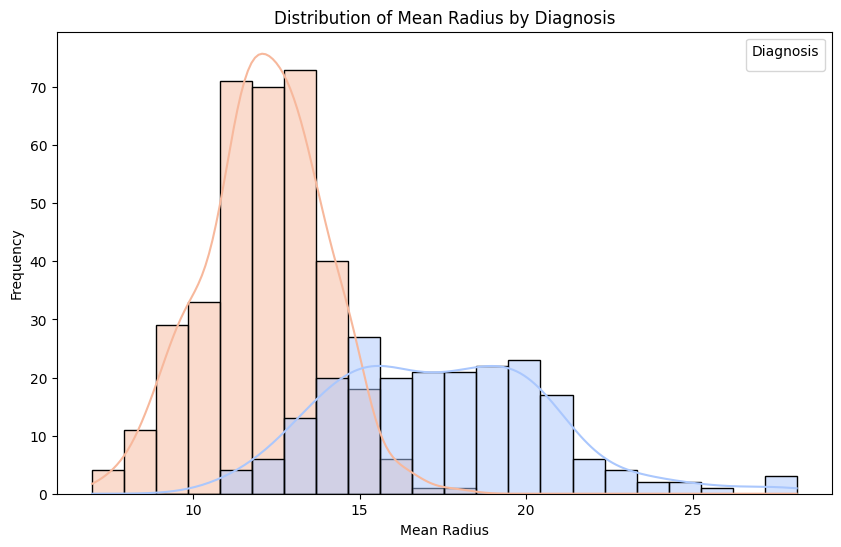

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Mean Radius', hue='Diagnosis', kde=True, palette='coolwarm')
plt.title('Distribution of Mean Radius by Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend(title='Diagnosis')
plt.show()

In [388]:
df["Diagnosis"] = df["Diagnosis"].map({"Malignant" : 1, "Benign" : 0})

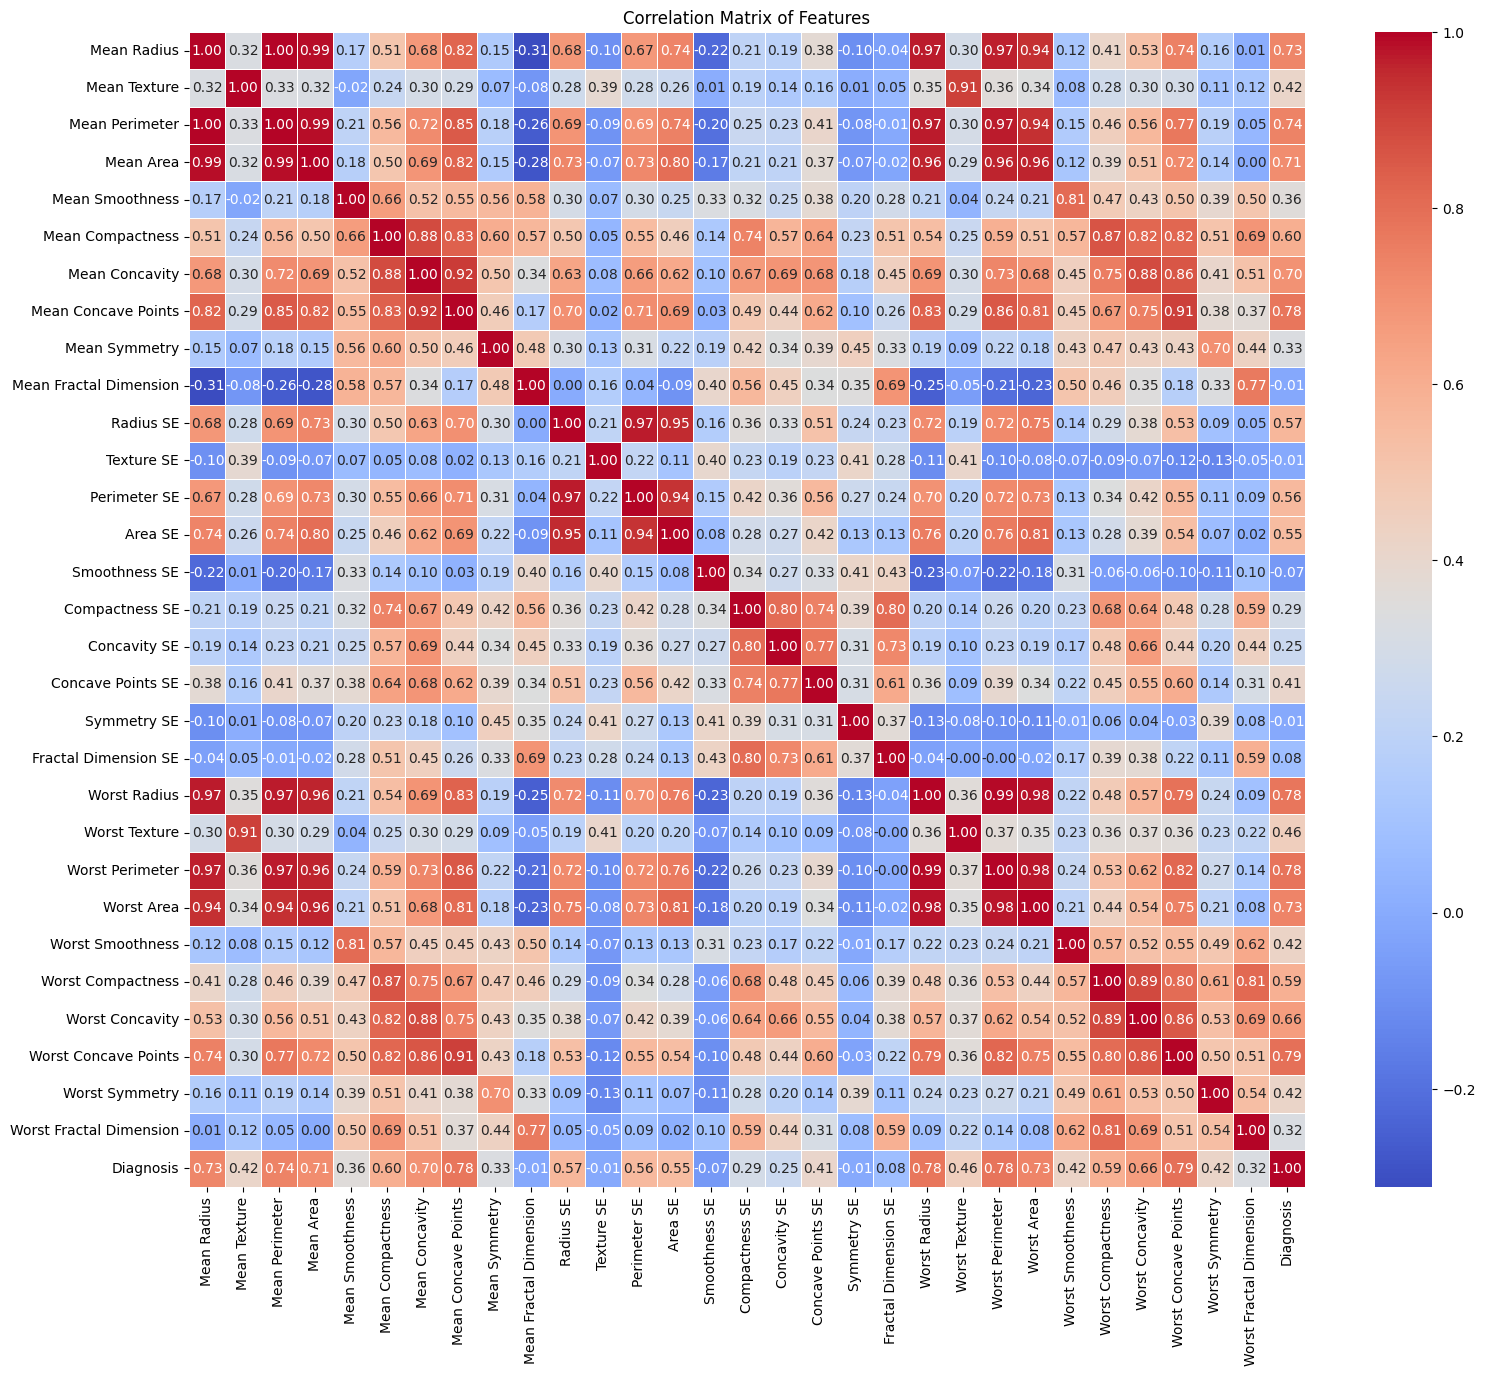

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns
#corelation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [390]:
# Get correlations with 'Diagnosis'
diagnosis_correlations = correlation_matrix['Diagnosis'].sort_values(ascending=False)

print("Features sorted by correlation with 'Diagnosis':")
print(diagnosis_correlations)

Features sorted by correlation with 'Diagnosis':
Diagnosis                  1.000000
Worst Concave Points       0.793566
Worst Perimeter            0.782914
Mean Concave Points        0.776614
Worst Radius               0.776454
Mean Perimeter             0.742636
Worst Area                 0.733825
Mean Radius                0.730029
Mean Area                  0.708984
Mean Concavity             0.696360
Worst Concavity            0.659610
Mean Compactness           0.596534
Worst Compactness          0.590998
Radius SE                  0.567134
Perimeter SE               0.556141
Area SE                    0.548236
Worst Texture              0.456903
Worst Smoothness           0.421465
Worst Symmetry             0.416294
Mean Texture               0.415185
Concave Points SE          0.408042
Mean Smoothness            0.358560
Mean Symmetry              0.330499
Worst Fractal Dimension    0.323872
Compactness SE             0.292999
Concavity SE               0.253730
Fractal Dimensi

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [392]:
result = []

In [393]:
X = df.drop(columns=["Diagnosis"],axis=1)
y = df["Diagnosis"]

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state=42)


In [395]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [396]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

recall_score_log_reg = recall_score(y_test, y_pred)
precision_score_log_reg = precision_score(y_test, y_pred)
f1_score_log_reg = f1_score(y_test, y_pred)
accuracy_score_log_reg = accuracy_score(y_test, y_pred)
named_log_reg_metrics = {
    "Model": "Logistic Regression (Initial Run)",
    "Recall": recall_score_log_reg,
    "Precision": precision_score_log_reg,
    "F1-Score": f1_score_log_reg,
    "Accuracy": accuracy_score_log_reg
}
result.append(named_log_reg_metrics)



In [397]:
print(result)

[{'Model': 'Logistic Regression (Initial Run)', 'Recall': 0.9841269841269841, 'Precision': 0.96875, 'F1-Score': 0.9763779527559056, 'Accuracy': 0.9824561403508771}]


In [398]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771}]

In [399]:
#check over fitting or not
y_train_pred = log_reg.predict(X_train_scaled)

recall_score_log_reg_train = recall_score(y_train, y_train_pred)
precision_score_log_reg_train = precision_score(y_train, y_train_pred)
f1_score_log_reg_train = f1_score(y_train, y_train_pred)
accuracy_score_log_reg_train = accuracy_score(y_train, y_train_pred)

print("\nLogistic Regression Training Set Metrics:")
print(f"Recall: {recall_score_log_reg_train:.4f}")
print(f"Precision: {precision_score_log_reg_train:.4f}")
print(f"F1-Score: {f1_score_log_reg_train:.4f}")
print(f"Accuracy: {accuracy_score_log_reg_train:.4f}")

print("\nLogistic Regression Test Set Metrics:")
print(f"Recall: {recall_score_log_reg:.4f}")
print(f"Precision: {precision_score_log_reg:.4f}")
print(f"F1-Score: {f1_score_log_reg:.4f}")
print(f"Accuracy: {accuracy_score_log_reg:.4f}")


Logistic Regression Training Set Metrics:
Recall: 0.9732
Precision: 0.9932
F1-Score: 0.9831
Accuracy: 0.9874

Logistic Regression Test Set Metrics:
Recall: 0.9841
Precision: 0.9688
F1-Score: 0.9764
Accuracy: 0.9825


In [400]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

recall_score_knn = recall_score(y_test, y_pred)
precision_score_knn = precision_score(y_test, y_pred)
f1_score_knn = f1_score(y_test, y_pred)
accuracy_score_knn = accuracy_score(y_test, y_pred)
named_knn_metrics = {
    "Model": "KNN (Initial Run)",
    "Recall": recall_score_knn,
    "Precision": precision_score_knn,
    "F1-Score": f1_score_knn,
    "Accuracy": accuracy_score_knn
}
result.append(named_knn_metrics)

In [401]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801}]

In [402]:
svc = SVC(kernel = "rbf", random_state=42)
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)

recall_score_svc = recall_score(y_test, y_pred)
precision_score_svc = precision_score(y_test, y_pred)
f1_score_svc = f1_score(y_test, y_pred)
accuracy_score_svc = accuracy_score(y_test, y_pred)
named_svc_metrics = {
    "Model": "svc (Initial Run)",
    "Recall": recall_score_svc,
    "Precision": precision_score_svc,
    "F1-Score": f1_score_svc,
    "Accuracy": accuracy_score_svc
}
result.append(named_svc_metrics)

In [403]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801},
 {'Model': 'svc (Initial Run)',
  'Recall': 0.9682539682539683,
  'Precision': 0.9682539682539683,
  'F1-Score': 0.9682539682539683,
  'Accuracy': 0.9766081871345029}]

In [404]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred = gnb.predict(X_test_scaled)

recall_score_gnb = recall_score(y_test, y_pred)
precision_score_gnb = precision_score(y_test, y_pred)
f1_score_gnb = f1_score(y_test, y_pred)
accuracy_score_gnb = accuracy_score(y_test, y_pred)
named_gnb_metrics = {
    "Model": "gnb (Initial Run)",
    "Recall": recall_score_gnb,
    "Precision": precision_score_gnb,
    "F1-Score": f1_score_gnb,
    "Accuracy": accuracy_score_gnb
}
result.append(named_gnb_metrics)

In [405]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801},
 {'Model': 'svc (Initial Run)',
  'Recall': 0.9682539682539683,
  'Precision': 0.9682539682539683,
  'F1-Score': 0.9682539682539683,
  'Accuracy': 0.9766081871345029},
 {'Model': 'gnb (Initial Run)',
  'Recall': 0.9047619047619048,
  'Precision': 0.9193548387096774,
  'F1-Score': 0.912,
  'Accuracy': 0.935672514619883}]

In [406]:
dt =  DecisionTreeClassifier(random_state = 42,max_depth=5)
dt.fit(X_train, y_train)
y_pred =  dt.predict(X_test)

recall_score_dt = recall_score(y_test, y_pred)
precision_score_dt = precision_score(y_test, y_pred)
f1_score_dt = f1_score(y_test, y_pred)
accuracy_score_dt = accuracy_score(y_test, y_pred)
named_dt_metrics = {
    "Model": "Decision Tree Classifier (Initial Run)",
    "Recall": recall_score_dt,
    "Precision": precision_score_dt,
    "F1-Score": f1_score_dt,
    "Accuracy": accuracy_score_dt
}
result.append(named_dt_metrics)

In [407]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801},
 {'Model': 'svc (Initial Run)',
  'Recall': 0.9682539682539683,
  'Precision': 0.9682539682539683,
  'F1-Score': 0.9682539682539683,
  'Accuracy': 0.9766081871345029},
 {'Model': 'gnb (Initial Run)',
  'Recall': 0.9047619047619048,
  'Precision': 0.9193548387096774,
  'F1-Score': 0.912,
  'Accuracy': 0.935672514619883},
 {'Model': 'Decision Tree Classifier (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9365079365079365,
  'F1-Score': 0.9365079365079365,
  'Accuracy': 0.9532163742690059}]

In [408]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


recall_score_rf = recall_score(y_test, y_pred)
precision_score_rf = precision_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)
accuracy_score_rf = accuracy_score(y_test, y_pred)
named_rf_metrics = {
    "Model": "Random Forest (Initial Run)",
    "Recall": recall_score_rf,
    "Precision": precision_score_rf,
    "F1-Score": f1_score_rf,
    "Accuracy": accuracy_score_rf
}
result.append(named_rf_metrics)

In [409]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801},
 {'Model': 'svc (Initial Run)',
  'Recall': 0.9682539682539683,
  'Precision': 0.9682539682539683,
  'F1-Score': 0.9682539682539683,
  'Accuracy': 0.9766081871345029},
 {'Model': 'gnb (Initial Run)',
  'Recall': 0.9047619047619048,
  'Precision': 0.9193548387096774,
  'F1-Score': 0.912,
  'Accuracy': 0.935672514619883},
 {'Model': 'Decision Tree Classifier (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9365079365079365,
  'F1-Score': 0.9365079365079365,
  'Accuracy': 0.9532163742690059},
 {'Model': 'Random Forest (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9833333333333333,
  'F1-Score': 0.959349593495935,
  'Accuracy': 0.970

In [410]:
gb = GradientBoostingClassifier(n_estimators=100,random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

recall_score_gb = recall_score(y_test, y_pred)
precision_score_gb = precision_score(y_test, y_pred)
f1_score_gb = f1_score(y_test, y_pred)
accuracy_score_gb = accuracy_score(y_test, y_pred)
named_gb_metrics = {
    "Model": "Gradient Boosting Classifier (Initial Run)",
    "Recall": recall_score_gb,
    "Precision": precision_score_gb,
    "F1-Score": f1_score_gb,
    "Accuracy": accuracy_score_gb
}
result.append(named_gb_metrics)

In [411]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801},
 {'Model': 'svc (Initial Run)',
  'Recall': 0.9682539682539683,
  'Precision': 0.9682539682539683,
  'F1-Score': 0.9682539682539683,
  'Accuracy': 0.9766081871345029},
 {'Model': 'gnb (Initial Run)',
  'Recall': 0.9047619047619048,
  'Precision': 0.9193548387096774,
  'F1-Score': 0.912,
  'Accuracy': 0.935672514619883},
 {'Model': 'Decision Tree Classifier (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9365079365079365,
  'F1-Score': 0.9365079365079365,
  'Accuracy': 0.9532163742690059},
 {'Model': 'Random Forest (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9833333333333333,
  'F1-Score': 0.959349593495935,
  'Accuracy': 0.970

In [412]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [413]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred = ada.predict(X_test_scaled)

recall_score_ada = recall_score(y_test, y_pred)
precision_score_ada = precision_score(y_test, y_pred)
f1_score_ada = f1_score(y_test, y_pred)
accuracy_score_ada = accuracy_score(y_test, y_pred)

named_ada_metrics = {
    "Model": "AdaBoost Classifier (Initial Run)",
    "Recall": recall_score_ada,
    "Precision": precision_score_ada,
    "F1-Score": f1_score_ada,
    "Accuracy": accuracy_score_ada
}
result.append(named_ada_metrics)

print("AdaBoost Classifier metrics added.")

AdaBoost Classifier metrics added.


In [414]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

recall_score_xgb = recall_score(y_test, y_pred)
precision_score_xgb = precision_score(y_test, y_pred)
f1_score_xgb = f1_score(y_test, y_pred)
accuracy_score_xgb = accuracy_score(y_test, y_pred)

named_xgb_metrics = {
    "Model": "XGBoost Classifier (Initial Run)",
    "Recall": recall_score_xgb,
    "Precision": precision_score_xgb,
    "F1-Score": f1_score_xgb,
    "Accuracy": accuracy_score_xgb
}
result.append(named_xgb_metrics)

print("XGBoost Classifier metrics added.")

XGBoost Classifier metrics added.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [415]:
import pandas as pd

results_df = pd.DataFrame(result)
display(results_df.sort_values(by='Accuracy', ascending=False))

,Model,Recall,Precision,F1-Score,Accuracy
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
8,XGBoost Classifier (Initial Run),0.968254,0.938462,0.953125,0.964912
1,KNN (Initial Run),0.936508,0.951613,0.944000,0.959064
6,Gradient Boosting Classifier (Initial Run),0.936508,0.951613,0.944000,0.959064
4,Decision Tree Classifier (Initial Run),0.936508,0.936508,0.936508,0.953216
3,gnb (Initial Run),0.904762,0.919355,0.912000,0.935673


In [416]:
results_df

,Model,Recall,Precision,F1-Score,Accuracy
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
1,KNN (Initial Run),0.936508,0.951613,0.944000,0.959064
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
3,gnb (Initial Run),0.904762,0.919355,0.912000,0.935673
4,Decision Tree Classifier (Initial Run),0.936508,0.936508,0.936508,0.953216
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
6,Gradient Boosting Classifier (Initial Run),0.936508,0.951613,0.944000,0.959064
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
8,XGBoost Classifier (Initial Run),0.968254,0.938462,0.953125,0.964912


In [417]:
best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("Best Model:")
print(best_model)

Best Model:
Model        Logistic Regression (Initial Run)
Recall                                0.984127
Precision                              0.96875
F1-Score                              0.976378
Accuracy                              0.982456
Name: 0, dtype: object


In [418]:
result

[{'Model': 'Logistic Regression (Initial Run)',
  'Recall': 0.9841269841269841,
  'Precision': 0.96875,
  'F1-Score': 0.9763779527559056,
  'Accuracy': 0.9824561403508771},
 {'Model': 'KNN (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9516129032258065,
  'F1-Score': 0.944,
  'Accuracy': 0.9590643274853801},
 {'Model': 'svc (Initial Run)',
  'Recall': 0.9682539682539683,
  'Precision': 0.9682539682539683,
  'F1-Score': 0.9682539682539683,
  'Accuracy': 0.9766081871345029},
 {'Model': 'gnb (Initial Run)',
  'Recall': 0.9047619047619048,
  'Precision': 0.9193548387096774,
  'F1-Score': 0.912,
  'Accuracy': 0.935672514619883},
 {'Model': 'Decision Tree Classifier (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9365079365079365,
  'F1-Score': 0.9365079365079365,
  'Accuracy': 0.9532163742690059},
 {'Model': 'Random Forest (Initial Run)',
  'Recall': 0.9365079365079365,
  'Precision': 0.9833333333333333,
  'F1-Score': 0.959349593495935,
  'Accuracy': 0.970

In [419]:
best_model

,0
Model,Logistic Regression (Initial Run)
Recall,0.984127
Precision,0.96875
F1-Score,0.976378
Accuracy,0.982456


In [420]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train)


best_log_reg_model = grid_search.best_estimator_
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")


y_pred_tuned = best_log_reg_model.predict(X_test_scaled)

recall_score_log_reg_tuned = recall_score(y_test, y_pred_tuned)
precision_score_log_reg_tuned = precision_score(y_test, y_pred_tuned)
f1_score_log_reg_tuned = f1_score(y_test, y_pred_tuned)
accuracy_score_log_reg_tuned = accuracy_score(y_test, y_pred_tuned)

named_log_reg_tuned_metrics = {
    "Model": "Logistic Regression (Tuned)",
    "Recall": recall_score_log_reg_tuned,
    "Precision": precision_score_log_reg_tuned,
    "F1-Score": f1_score_log_reg_tuned,
    "Accuracy": accuracy_score_log_reg_tuned
}
result.append(named_log_reg_tuned_metrics)

print("Logistic Regression (Tuned) metrics added.")

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression (Tuned) metrics added.


In [421]:
import pandas as pd

results_df = pd.DataFrame(result)
display(results_df.sort_values(by='Accuracy', ascending=False))


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
8,XGBoost Classifier (Initial Run),0.968254,0.938462,0.953125,0.964912
1,KNN (Initial Run),0.936508,0.951613,0.944000,0.959064
6,Gradient Boosting Classifier (Initial Run),0.936508,0.951613,0.944000,0.959064
4,Decision Tree Classifier (Initial Run),0.936508,0.936508,0.936508,0.953216
3,gnb (Initial Run),0.904762,0.919355,0.912000,0.935673


In [422]:
best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("New Best Model After Tuning:")
print(best_model)

New Best Model After Tuning:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [423]:
from sklearn.ensemble import StackingClassifier


log_reg_tuned = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svc_model = SVC(kernel='rbf', random_state=42, probability=True) # probability=True for StackingClassifier

estimators = [
    ('logistic', log_reg_tuned),
    ('knn', knn_model),
    ('svc', svc_model)
]


final_estimator = LogisticRegression(solver='liblinear', random_state=42)


stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)


stacking_classifier.fit(X_train_scaled, y_train)


y_pred_stacking = stacking_classifier.predict(X_test_scaled)


recall_score_stacking = recall_score(y_test, y_pred_stacking)
precision_score_stacking = precision_score(y_test, y_pred_stacking)
f1_score_stacking = f1_score(y_test, y_pred_stacking)
accuracy_score_stacking = accuracy_score(y_test, y_pred_stacking)


named_stacking_metrics = {
    "Model": "Stacking Classifier",
    "Recall": recall_score_stacking,
    "Precision": precision_score_stacking,
    "F1-Score": f1_score_stacking,
    "Accuracy": accuracy_score_stacking
}
result.append(named_stacking_metrics)

print("Stacking Classifier metrics added.")


import pandas as pd

results_df = pd.DataFrame(result)
display(results_df.sort_values(by='Accuracy', ascending=False))


best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After Stacking:")
print(best_model)


Stacking Classifier metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
10,Stacking Classifier,0.968254,0.953125,0.960630,0.970760
8,XGBoost Classifier (Initial Run),0.968254,0.938462,0.953125,0.964912
1,KNN (Initial Run),0.936508,0.951613,0.944000,0.959064
6,Gradient Boosting Classifier (Initial Run),0.936508,0.951613,0.944000,0.959064
4,Decision Tree Classifier (Initial Run),0.936508,0.936508,0.936508,0.953216



Overall Best Model After Stacking:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [424]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


X_engineered = X.copy()


X_engineered['Mean_Perimeter_Area_Ratio'] = X_engineered['Mean Perimeter'] / X_engineered['Mean Area']
X_engineered['Mean_Concavity_Compactness_Ratio'] = X_engineered['Mean Concavity'] / X_engineered['Mean Compactness']
X_engineered['Worst_Mean_Radius_Ratio'] = X_engineered['Worst Radius'] / X_engineered['Mean Radius']
X_engineered['Mean_Radius_Texture_Interaction'] = X_engineered['Mean Radius'] * X_engineered['Mean Texture']
X_engineered['Worst_ConcavePoints_Smoothness_Interaction'] = X_engineered['Worst Concave Points'] * X_engineered['Worst Smoothness']


poly = PolynomialFeatures(degree=2, include_bias=False)


poly_features_to_transform = X_engineered[['Mean Radius', 'Worst Concave Points']]
poly_features_array = poly.fit_transform(poly_features_to_transform)


poly_feature_names = poly.get_feature_names_out(poly_features_to_transform.columns)

poly_df = pd.DataFrame(poly_features_array, columns=poly_feature_names, index=X_engineered.index)

for col in poly_df.columns:
    if col not in X_engineered.columns:
        X_engineered[col] = poly_df[col]

print("Shape of X_engineered after feature engineering:", X_engineered.shape)
print("First 5 rows of X_engineered with new features:")
print(X_engineered.head())

Shape of X_engineered after feature engineering: (569, 38)
First 5 rows of X_engineered with new features:
   Mean Radius  Mean Texture  Mean Perimeter  Mean Area  Mean Smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   Mean Compactness  Mean Concavity  Mean Concave Points  Mean Symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430     

In [425]:
from sklearn.model_selection import train_test_split

X_train_engineered, X_test_engineered, y_train, y_test = train_test_split(X_engineered, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train_engineered shape: {X_train_engineered.shape}")
print(f"X_test_engineered shape: {X_test_engineered.shape}")

Data split into training and testing sets successfully.
X_train_engineered shape: (398, 38)
X_test_engineered shape: (171, 38)


In [426]:
scaler = StandardScaler()
X_train_engineered_scaled = scaler.fit_transform(X_train_engineered)
X_test_engineered_scaled = scaler.transform(X_test_engineered)

print("Engineered features scaled successfully.")
print(f"Shape of X_train_engineered_scaled: {X_train_engineered_scaled.shape}")
print(f"Shape of X_test_engineered_scaled: {X_test_engineered_scaled.shape}")

Engineered features scaled successfully.
Shape of X_train_engineered_scaled: (398, 38)
Shape of X_test_engineered_scaled: (171, 38)


In [427]:
log_reg_tuned_engineered = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
log_reg_tuned_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_log_reg_engineered = log_reg_tuned_engineered.predict(X_test_engineered_scaled)

recall_score_log_reg_tuned_engineered = recall_score(y_test, y_pred_log_reg_engineered)
precision_score_log_reg_tuned_engineered = precision_score(y_test, y_pred_log_reg_engineered)
f1_score_log_reg_tuned_engineered = f1_score(y_test, y_pred_log_reg_engineered)
accuracy_score_log_reg_tuned_engineered = accuracy_score(y_test, y_pred_log_reg_engineered)

named_log_reg_engineered_metrics = {
    "Model": "Logistic Regression (Engineered Features)",
    "Recall": recall_score_log_reg_tuned_engineered,
    "Precision": precision_score_log_reg_tuned_engineered,
    "F1-Score": f1_score_log_reg_tuned_engineered,
    "Accuracy": accuracy_score_log_reg_tuned_engineered
}
result.append(named_log_reg_engineered_metrics)

print("Logistic Regression (Engineered Features) metrics calculated and appended.")

Logistic Regression (Engineered Features) metrics calculated and appended.


In [428]:
svc_engineered = SVC(kernel = "rbf", random_state=42)
svc_engineered.fit(X_train_engineered_scaled, y_train)
y_pred_svc_engineered = svc_engineered.predict(X_test_engineered_scaled)

recall_score_svc_engineered = recall_score(y_test, y_pred_svc_engineered)
precision_score_svc_engineered = precision_score(y_test, y_pred_svc_engineered)
f1_score_svc_engineered = f1_score(y_test, y_pred_svc_engineered)
accuracy_score_svc_engineered = accuracy_score(y_test, y_pred_svc_engineered)

named_svc_engineered_metrics = {
    "Model": "SVC (Engineered Features)",
    "Recall": recall_score_svc_engineered,
    "Precision": precision_score_svc_engineered,
    "F1-Score": f1_score_svc_engineered,
    "Accuracy": accuracy_score_svc_engineered
}
result.append(named_svc_engineered_metrics)

print("SVC (Engineered Features) metrics calculated and appended.")

SVC (Engineered Features) metrics calculated and appended.


In [429]:
import pandas as pd

results_df = pd.DataFrame(result)
display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After Feature Engineering:")
print(best_model)

,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
10,Stacking Classifier,0.968254,0.953125,0.960630,0.970760
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
8,XGBoost Classifier (Initial Run),0.968254,0.938462,0.953125,0.964912
1,KNN (Initial Run),0.936508,0.951613,0.944000,0.959064



Overall Best Model After Feature Engineering:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [430]:
from sklearn.ensemble import StackingClassifier

log_reg_base = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
svc_base = SVC(kernel='rbf', random_state=42, probability=True)
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)

estimators_engineered = [
    ('logistic_engineered', log_reg_base),
    ('svc_engineered', svc_base),
    ('random_forest_engineered', rf_base)
]


final_estimator_engineered = LogisticRegression(solver='liblinear', random_state=42)
stacking_classifier_engineered = StackingClassifier(
    estimators=estimators_engineered,
    final_estimator=final_estimator_engineered,
    cv=5,
    n_jobs=-1
)

stacking_classifier_engineered.fit(X_train_engineered_scaled, y_train)

y_pred_stacking_engineered = stacking_classifier_engineered.predict(X_test_engineered_scaled)

recall_score_stacking_engineered = recall_score(y_test, y_pred_stacking_engineered)
precision_score_stacking_engineered = precision_score(y_test, y_pred_stacking_engineered)
f1_score_stacking_engineered = f1_score(y_test, y_pred_stacking_engineered)
accuracy_score_stacking_engineered = accuracy_score(y_test, y_pred_stacking_engineered)

named_stacking_engineered_metrics = {
    "Model": "Stacking Classifier (Engineered Features)",
    "Recall": recall_score_stacking_engineered,
    "Precision": precision_score_stacking_engineered,
    "F1-Score": f1_score_stacking_engineered,
    "Accuracy": accuracy_score_stacking_engineered
}
result.append(named_stacking_engineered_metrics)

print("Stacking Classifier (Engineered Features) metrics added.")

results_df = pd.DataFrame(result)

display(results_df.sort_values(by='Accuracy', ascending=False))
best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After Advanced Stacking with Engineered Features:")
print(best_model)

Stacking Classifier (Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
10,Stacking Classifier,0.968254,0.953125,0.960630,0.970760
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
8,XGBoost Classifier (Initial Run),0.968254,0.938462,0.953125,0.964912



Overall Best Model After Advanced Stacking with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [431]:
from sklearn.ensemble import StackingClassifier
log_reg_base = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
svc_base = SVC(kernel='rbf', random_state=42, probability=True)
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)

estimators_engineered = [
    ('logistic_engineered', log_reg_base),
    ('svc_engineered', svc_base),
    ('random_forest_engineered', rf_base)
]

final_estimator_engineered = LogisticRegression(solver='liblinear', random_state=42)

stacking_classifier_engineered = StackingClassifier(
    estimators=estimators_engineered,
    final_estimator=final_estimator_engineered,
    cv=5,
    n_jobs=-1
)

stacking_classifier_engineered.fit(X_train_engineered_scaled, y_train)


y_pred_stacking_engineered = stacking_classifier_engineered.predict(X_test_engineered_scaled)


recall_score_stacking_engineered = recall_score(y_test, y_pred_stacking_engineered)
precision_score_stacking_engineered = precision_score(y_test, y_pred_stacking_engineered)
f1_score_stacking_engineered = f1_score(y_test, y_pred_stacking_engineered)
accuracy_score_stacking_engineered = accuracy_score(y_test, y_pred_stacking_engineered)

named_stacking_engineered_metrics = {
    "Model": "Stacking Classifier (Engineered Features)",
    "Recall": recall_score_stacking_engineered,
    "Precision": precision_score_stacking_engineered,
    "F1-Score": f1_score_stacking_engineered,
    "Accuracy": accuracy_score_stacking_engineered
}
result.append(named_stacking_engineered_metrics)

print("Stacking Classifier (Engineered Features) metrics added.")


results_df = pd.DataFrame(result)


display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After Advanced Stacking with Engineered Features:")
print(best_model)

Stacking Classifier (Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
14,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760
10,Stacking Classifier,0.968254,0.953125,0.960630,0.970760



Overall Best Model After Advanced Stacking with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [432]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}


grid_search_svc = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_svc.fit(X_train_engineered_scaled, y_train)


best_svc_model = grid_search_svc.best_estimator_
print(f"Best parameters for SVC: {grid_search_svc.best_params_}")

y_pred_svc_tuned_engineered = best_svc_model.predict(X_test_engineered_scaled)

recall_score_svc_tuned_engineered = recall_score(y_test, y_pred_svc_tuned_engineered)
precision_score_svc_tuned_engineered = precision_score(y_test, y_pred_svc_tuned_engineered)
f1_score_svc_tuned_engineered = f1_score(y_test, y_pred_svc_tuned_engineered)
accuracy_score_svc_tuned_engineered = accuracy_score(y_test, y_pred_svc_tuned_engineered)


named_svc_tuned_engineered_metrics = {
    "Model": "SVC (Tuned with Engineered Features)",
    "Recall": recall_score_svc_tuned_engineered,
    "Precision": precision_score_svc_tuned_engineered,
    "F1-Score": f1_score_svc_tuned_engineered,
    "Accuracy": accuracy_score_svc_tuned_engineered
}
result.append(named_svc_tuned_engineered_metrics)

print("SVC (Tuned with Engineered Features) metrics added.")


results_df = pd.DataFrame(result)


display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After SVC Tuning with Engineered Features:")
print(best_model)

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVC (Tuned with Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
15,SVC (Tuned with Engineered Features),0.968254,0.968254,0.968254,0.976608
14,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
7,AdaBoost Classifier (Initial Run),0.968254,0.953125,0.960630,0.970760



Overall Best Model After SVC Tuning with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [433]:
from sklearn.model_selection import GridSearchCV


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_rf.fit(X_train_engineered_scaled, y_train)


best_rf_model = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

y_pred_rf_tuned_engineered = best_rf_model.predict(X_test_engineered_scaled)


recall_score_rf_tuned_engineered = recall_score(y_test, y_pred_rf_tuned_engineered)
precision_score_rf_tuned_engineered = precision_score(y_test, y_pred_rf_tuned_engineered)
f1_score_rf_tuned_engineered = f1_score(y_test, y_pred_rf_tuned_engineered)
accuracy_score_rf_tuned_engineered = accuracy_score(y_test, y_pred_rf_tuned_engineered)

named_rf_tuned_engineered_metrics = {
    "Model": "Random Forest (Tuned with Engineered Features)",
    "Recall": recall_score_rf_tuned_engineered,
    "Precision": precision_score_rf_tuned_engineered,
    "F1-Score": f1_score_rf_tuned_engineered,
    "Accuracy": accuracy_score_rf_tuned_engineered
}
result.append(named_rf_tuned_engineered_metrics)

print("Random Forest (Tuned with Engineered Features) metrics added.")

results_df = pd.DataFrame(result)

display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After Random Forest Tuning with Engineered Features:")
print(best_model)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest (Tuned with Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
15,SVC (Tuned with Engineered Features),0.968254,0.968254,0.968254,0.976608
14,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760
10,Stacking Classifier,0.968254,0.953125,0.960630,0.970760



Overall Best Model After Random Forest Tuning with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [434]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}


grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_xgb.fit(X_train_engineered_scaled, y_train)


best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

y_pred_xgb_tuned_engineered = best_xgb_model.predict(X_test_engineered_scaled)

recall_score_xgb_tuned_engineered = recall_score(y_test, y_pred_xgb_tuned_engineered)
precision_score_xgb_tuned_engineered = precision_score(y_test, y_pred_xgb_tuned_engineered)
f1_score_xgb_tuned_engineered = f1_score(y_test, y_pred_xgb_tuned_engineered)
accuracy_score_xgb_tuned_engineered = accuracy_score(y_test, y_pred_xgb_tuned_engineered)

named_xgb_tuned_engineered_metrics = {
    "Model": "XGBoost (Tuned with Engineered Features)",
    "Recall": recall_score_xgb_tuned_engineered,
    "Precision": precision_score_xgb_tuned_engineered,
    "F1-Score": f1_score_xgb_tuned_engineered,
    "Accuracy": accuracy_score_xgb_tuned_engineered
}
result.append(named_xgb_tuned_engineered_metrics)

print("XGBoost (Tuned with Engineered Features) metrics added.")

results_df = pd.DataFrame(result)

display(results_df.sort_values(by='Accuracy', ascending=False))
best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After XGBoost Tuning with Engineered Features:")
print(best_model)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
XGBoost (Tuned with Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
17,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
14,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
15,SVC (Tuned with Engineered Features),0.968254,0.968254,0.968254,0.976608
5,Random Forest (Initial Run),0.936508,0.983333,0.959350,0.970760



Overall Best Model After XGBoost Tuning with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [435]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_xgb.fit(X_train_engineered_scaled, y_train)


best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

y_pred_xgb_tuned_engineered = best_xgb_model.predict(X_test_engineered_scaled)

recall_score_xgb_tuned_engineered = recall_score(y_test, y_pred_xgb_tuned_engineered)
precision_score_xgb_tuned_engineered = precision_score(y_test, y_pred_xgb_tuned_engineered)
f1_score_xgb_tuned_engineered = f1_score(y_test, y_pred_xgb_tuned_engineered)
accuracy_score_xgb_tuned_engineered = accuracy_score(y_test, y_pred_xgb_tuned_engineered)

named_xgb_tuned_engineered_metrics = {
    "Model": "XGBoost (Tuned with Engineered Features)",
    "Recall": recall_score_xgb_tuned_engineered,
    "Precision": precision_score_xgb_tuned_engineered,
    "F1-Score": f1_score_xgb_tuned_engineered,
    "Accuracy": accuracy_score_xgb_tuned_engineered
}
result.append(named_xgb_tuned_engineered_metrics)

print("XGBoost (Tuned with Engineered Features) metrics added.")

results_df = pd.DataFrame(result)

display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After XGBoost Tuning with Engineered Features:")
print(best_model)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
XGBoost (Tuned with Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
17,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
18,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
15,SVC (Tuned with Engineered Features),0.968254,0.968254,0.968254,0.976608
14,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608



Overall Best Model After XGBoost Tuning with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [436]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_engineered_scaled, y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

y_pred_rf_tuned_engineered = best_rf_model.predict(X_test_engineered_scaled)

recall_score_rf_tuned_engineered = recall_score(y_test, y_pred_rf_tuned_engineered)
precision_score_rf_tuned_engineered = precision_score(y_test, y_pred_rf_tuned_engineered)
f1_score_rf_tuned_engineered = f1_score(y_test, y_pred_rf_tuned_engineered)
accuracy_score_rf_tuned_engineered = accuracy_score(y_test, y_pred_rf_tuned_engineered)

named_rf_tuned_engineered_metrics = {
    "Model": "Random Forest (Tuned with Engineered Features)",
    "Recall": recall_score_rf_tuned_engineered,
    "Precision": precision_score_rf_tuned_engineered,
    "F1-Score": f1_score_rf_tuned_engineered,
    "Accuracy": accuracy_score_rf_tuned_engineered
}
result.append(named_rf_tuned_engineered_metrics)

print("Random Forest (Tuned with Engineered Features) metrics added.")

results_df = pd.DataFrame(result)

display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After Random Forest Tuning with Engineered Features:")
print(best_model)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest (Tuned with Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
18,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
17,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
14,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
15,SVC (Tuned with Engineered Features),0.968254,0.968254,0.968254,0.976608



Overall Best Model After Random Forest Tuning with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [437]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_xgb.fit(X_train_engineered_scaled, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

y_pred_xgb_tuned_engineered = best_xgb_model.predict(X_test_engineered_scaled)

recall_score_xgb_tuned_engineered = recall_score(y_test, y_pred_xgb_tuned_engineered)
precision_score_xgb_tuned_engineered = precision_score(y_test, y_pred_xgb_tuned_engineered)
f1_score_xgb_tuned_engineered = f1_score(y_test, y_pred_xgb_tuned_engineered)
accuracy_score_xgb_tuned_engineered = accuracy_score(y_test, y_pred_xgb_tuned_engineered)

named_xgb_tuned_engineered_metrics = {
    "Model": "XGBoost (Tuned with Engineered Features)",
    "Recall": recall_score_xgb_tuned_engineered,
    "Precision": precision_score_xgb_tuned_engineered,
    "F1-Score": f1_score_xgb_tuned_engineered,
    "Accuracy": accuracy_score_xgb_tuned_engineered
}
result.append(named_xgb_tuned_engineered_metrics)

print("XGBoost (Tuned with Engineered Features) metrics added.")

results_df = pd.DataFrame(result)

display(results_df.sort_values(by='Accuracy', ascending=False))

best_model = results_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print("\nOverall Best Model After XGBoost Tuning with Engineered Features:")
print(best_model)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
XGBoost (Tuned with Engineered Features) metrics added.


,Model,Recall,Precision,F1-Score,Accuracy
9,Logistic Regression (Tuned),0.984127,1.000000,0.992000,0.994152
18,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
20,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
11,Logistic Regression (Engineered Features),0.984127,0.984127,0.984127,0.988304
17,XGBoost (Tuned with Engineered Features),0.984127,0.984127,0.984127,0.988304
0,Logistic Regression (Initial Run),0.984127,0.968750,0.976378,0.982456
13,Stacking Classifier (Engineered Features),0.968254,0.968254,0.968254,0.976608
12,SVC (Engineered Features),0.968254,0.968254,0.968254,0.976608
2,svc (Initial Run),0.968254,0.968254,0.968254,0.976608
15,SVC (Tuned with Engineered Features),0.968254,0.968254,0.968254,0.976608



Overall Best Model After XGBoost Tuning with Engineered Features:
Model        Logistic Regression (Tuned)
Recall                          0.984127
Precision                            1.0
F1-Score                           0.992
Accuracy                        0.994152
Name: 9, dtype: object


In [438]:
import pickle
filename = 'best_logistic_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_log_reg_model, file)

print(f"Best model ('{best_model['Model']}') saved successfully as {filename}")

Best model ('Logistic Regression (Tuned)') saved successfully as best_logistic_regression_model.pkl
